In [8]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import numpy as np

In [9]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()   #加载MNIST数据集
x_train = x_train.reshape(-1,784).astype('float32')/255   #训练集图像打平并归一化 
x_test = x_test.reshape(-1,784).astype('float32')/255     

In [10]:
noisy_factor=0.3   #噪声比例
x_train_noisy = x_train + noisy_factor*np.random.normal(0, 1,x_train.shape)   #加噪
x_test_noisy = x_test + noisy_factor*np.random.normal(0,1, x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0,1)    #限制噪声最大最小值
x_test_noisy = np.clip(x_test_noisy,0,1)

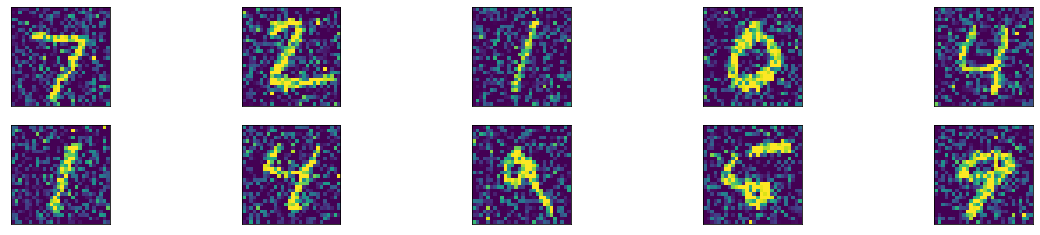

In [12]:
def show_noisy_images(start,end):   #显示噪声图像
    plt.figure(figsize=(20, 4))
    for i in range(start,end):
        ax = plt.subplot(2,5, i+1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.show()

show_noisy_images(0,10)

In [13]:
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.Encoder = tf.keras.models.Sequential([   #编码器网络
            layers.Dense(512, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(256, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(60, kernel_initializer = 'normal', activation = 'relu')
        ])
        self.Decoder = tf.keras.models.Sequential([   #解码器网络
            layers.Dense(256, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(512, kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(784, kernel_initializer = 'normal', activation = 'sigmoid')
        ])
    def call(self,input_features,training = None):   #前向传播
        code = self.Encoder(input_features)   #数据编码
        reconstructed = self.Decoder(code)   #数据解码
        return reconstructed

In [14]:
model = Autoencoder()                     #模型创建
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy,x_train, epochs = 10, batch_size = 256, shuffle = True, validation_data = (x_test_noisy[:4000], x_test[:4000]))   

Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.3073 - val_loss: 0.1600
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1522 - val_loss: 0.1334
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1293 - val_loss: 0.1229
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1193 - val_loss: 0.1142
Epoch 5/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1127 - val_loss: 0.1095
Epoch 6/10
235/235 [==============================] - 6s 28ms/step - loss: 0.1076 - val_loss: 0.1073
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1047 - val_loss: 0.1043
Epoch 8/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1018 - val_loss: 0.1023
Epoch 9/10
235/235 [==============================] - 7s 32ms/step - loss: 0.1000 - val_loss: 0.1008
Epoch 10/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0983 - val_lo

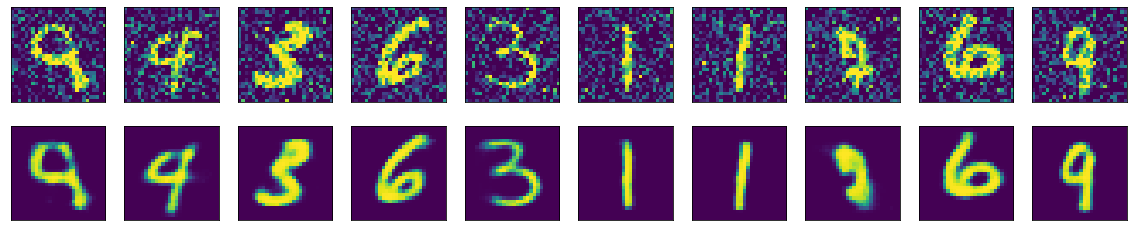

In [46]:
decoded_imgs = model.predict(x_test_noisy[4000:])
#原图片与去噪后的图片对比
plt.figure(figsize = (20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.reshape(x_test_noisy[4000+i], [28, 28]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()   #加载MNIST数据集
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255   #训练集 
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255   #测试集 

In [16]:
noisy_factor=0.3
x_train_noisy = x_train + noisy_factor*np.random.normal(0, 1,x_train.shape) 
x_test_noisy = x_test + noisy_factor*np.random.normal(0,1, x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0,1)
x_test_noisy = np.clip(x_test_noisy,0,1)

In [17]:
class Conv_Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Conv_Autoencoder,self).__init__()
        self.Encoder = tf.keras.models.Sequential([   #编码器网络
            layers.Conv2D(16,(3,3),kernel_initializer = 'normal',padding = 'same',activation = 'relu'),
            layers.MaxPool2D((2,2)),
            layers.Conv2D(8,(3,3),kernel_initializer = 'normal',padding = 'same',activation = 'relu'),
            layers.MaxPool2D((2,2))
        ])
        self.Decoder = tf.keras.models.Sequential([   #解码器网络
            layers.UpSampling2D((2,2)),
            layers.Conv2D(8,(3,3),kernel_initializer = 'normal',padding = 'same', activation = 'relu'),
            layers.UpSampling2D((2,2)),
            layers.Conv2D(16,(3,3),kernel_initializer = 'normal',padding = 'same', activation = 'relu'),
            layers.Conv2D(1,(3,3),kernel_initializer = 'normal',padding = 'same', activation = 'sigmoid')
        ])
    def call(self,input_features,training = None):   #前向传播         
        code = self.Encoder(input_features)                      
        reconstructed = self.Decoder(code)                       
        return reconstructed

In [18]:
model = Conv_Autoencoder()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy,x_train, epochs = 10, batch_size = 256, shuffle = True, validation_data = (x_test_noisy[:4000], x_test[:4000]))   

Epoch 1/10
235/235 [==============================] - 61s 256ms/step - loss: 0.4531 - val_loss: 0.1500
Epoch 2/10
235/235 [==============================] - 65s 276ms/step - loss: 0.1382 - val_loss: 0.1148
Epoch 3/10
235/235 [==============================] - 63s 270ms/step - loss: 0.1141 - val_loss: 0.1078
Epoch 4/10
235/235 [==============================] - 60s 255ms/step - loss: 0.1080 - val_loss: 0.1046
Epoch 5/10
235/235 [==============================] - 64s 274ms/step - loss: 0.1052 - val_loss: 0.1027
Epoch 6/10
235/235 [==============================] - 62s 265ms/step - loss: 0.1034 - val_loss: 0.1012
Epoch 7/10
235/235 [==============================] - 60s 254ms/step - loss: 0.1021 - val_loss: 0.0998
Epoch 8/10
235/235 [==============================] - 58s 247ms/step - loss: 0.1009 - val_loss: 0.0988
Epoch 9/10
235/235 [==============================] - 60s 256ms/step - loss: 0.0998 - val_loss: 0.0979
Epoch 10/10
235/235 [==============================] - 62s 263ms/step - l

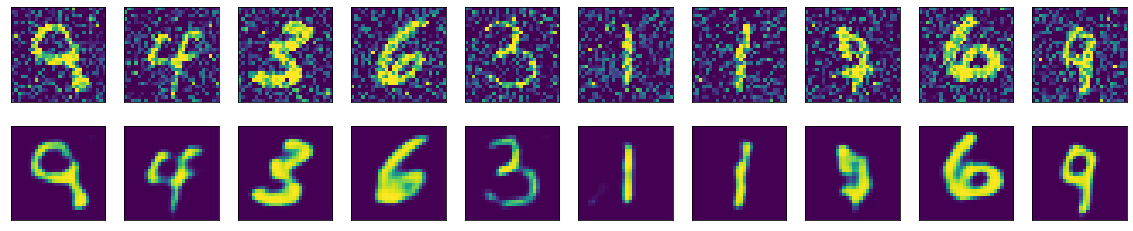

In [12]:
decoded_imgs = model.predict(x_test_noisy[4000:])
#原图片与去噪后的图片对比
plt.figure(figsize = (20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.reshape(x_test_noisy[4000+i], [28, 28]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()